In [1]:
import networkx as nx
import numpy as np
import pandas as pd

from tqdm import tqdm

In [2]:
def build_graph(dataframe):
    """Takes the transaction dataframe and produces a directed graph with customers and merchants as nodes and transactions as edges.

    Args:
        data_set (Dataframe): The transaction data, columns are
        [step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud]

    Returns:
        DiGraph: A directed graph with the above properties
    """
    G = nx.MultiDiGraph()

    for index, row in dataframe.iterrows():
        step, customer, age, _, gender, merchant, _, category, amount, _ = row
        if customer not in G:
            G.add_node(customer, age=age, gender=gender)
        if merchant not in G:
            G.add_node(merchant)
        G.add_edge(customer, merchant, amount=amount, category=category)
    return G

In [3]:
df = pd.read_csv('original_data.csv')
G = build_graph(df)

In [4]:
customer_nodes = [n for n in G.nodes if 'C' in n]

In [5]:
df.assign(degree_centrality = np.zeros(len(df)))
degree_centralities = nx.centrality.degree_centrality(G)
for n in tqdm(customer_nodes):
    df.loc[df['customer'] == n, 'degree_centrality'] = degree_centralities[n]

  0%|          | 5/4112 [00:00<01:25, 47.84it/s]

100%|██████████| 4112/4112 [01:21<00:00, 50.19it/s]


<AxesSubplot: ylabel='Frequency'>

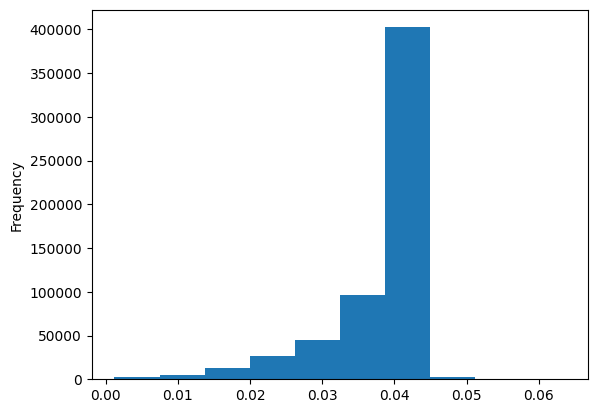

In [6]:
df['degree_centrality'].plot.hist()

In [7]:
df.assign(page_rank = np.zeros(len(df)))
page_ranks = nx.pagerank(G.to_undirected())
for n in customer_nodes:
    df.loc[df['customer'] == n, 'page_rank'] = page_ranks[n]

In [8]:
df['page_rank'].unique()

array([1.47152187e-04, 1.45792116e-04, 8.22216363e-05, ...,
       8.33530979e-05, 4.49456644e-05, 4.11473047e-05])

<AxesSubplot: ylabel='Frequency'>

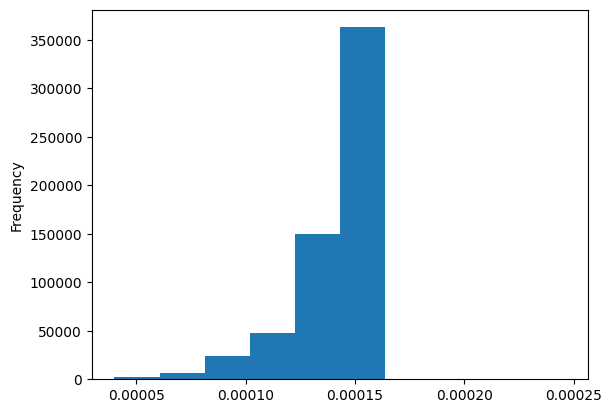

In [11]:
df['page_rank'].plot.hist()

In [25]:
lpa_communities = nx.community.asyn_lpa_communities(G.to_undirected(), weight='amount', seed=42)
df.assign(lpa_community = np.zeros(len(df), dtype=int))
for index, community in enumerate(lpa_communities):
    df.loc[df['customer'].isin(community), 'lpa_community'] = index

<AxesSubplot: ylabel='Frequency'>

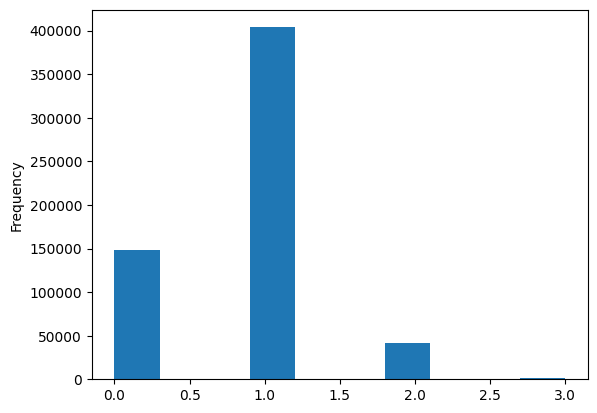

In [26]:
df['lpa_community'].plot.hist()